# Layer Explaination
학습목표
- tensorflow modeling을 하기 전에 layer을 보면서 어떻게 작동하는지 알아 볼 것이고, 
- 어떤 것이 들어가면 어떤 것이 나오는지를 시각화
- 어떻게 layer을 쌓는지.


In [1]:
import tensorflow as tf
import numpy as np

## 1. Input Image
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드
- os
- glob
- matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#MNIST이미지를 사용
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
image = train_x[0]
image.shape #이미지를 불러왔으면 shape를 확인하는게 제일 먼저이다!!!!

(28, 28)

In [5]:
#이미지를 한개만 보고 싶기 때문에 , 그리고 맨 뒤에 색을 나타내는 channel추가 해야하기 때문에 
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

---------------------이 위의 내용은 전 단계에서 배우고 해본 것이다. ---------------------------

## 2. Feature Extraction
이미지가 가지고 있는 특징 등을 뽑아내는 것. 어떻게?? convolution

### 1) Convolution 과 그 결과를 Visualization

- **filters** : leyer에서 나갈 때 몇 개의 filter를 만들 것인지 
- **kernel_size** : filter(Weight)의 사이즈. 주로(3, 3)
- **strides** : 몇개의 pixel을 skip하면서 훑어지나 갈 것인지 (사이즈에도 영향을 줌) 디폴트는 (1, 1)
- **paddind** : zero padding을 만 들 것인지 VALID는 Padding이 없고, SAME은 Padding이 있음. (사이즈에도 영향을 줌) 
- **activation** : Activation Function을 만들 것인지, 당장 설정 안해도 Layer층을 따로 만들 수 있음.

In [6]:
tf.keras.layers.Conv2D(filters = 3, kernel_size = (3, 3), strides = (1, 1), padding = 'SAME', activation = 'relu') #keras에선 이렇게 한 줄로 표현 할 수 있다. 
#간단하rp tf.keras.layers.Conv2D(3, 3, 1, 'SAME') 이렇게도 쓸 수 있다. 

- tf.keras.layers.Conv2D

In [7]:
layer = tf.keras.layers.Conv2D(filters = 3, kernel_size = (3, 3), strides = (1, 1), padding = 'SAME', activation = 'relu')
layer

In [8]:
#output = layer(image)#이렇게만 하면  Incompatible type conversion requested to type 'uint8' for variable of type 'float32' 이런 에러가 뜬다. 그래서 int형을 float형으로 바꿔 줘야함

image = tf.cast(image, dtype = tf.float32)
image.dtype

tf.float32

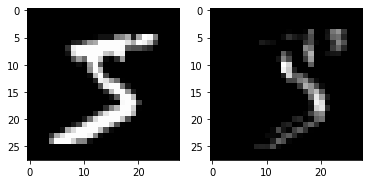

In [9]:
#원래 이미지
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], 'gray')

#filter처리 한 것 중 하나
plt.subplot(1, 2, 2)
output = layer(image)
plt.imshow(output[0, :, :, 0], 'gray')

plt.show()

#### weight불러오기
- layer.get_weight()

In [10]:
weight = layer.get_weights() #이렇게 get_weight()를 활용해서 layer의 weight를 확인한다. 

In [11]:
weight[0].shape#weight의 shape

(3, 3, 1, 3)

In [12]:
weight[1].shape #bias

(3,)

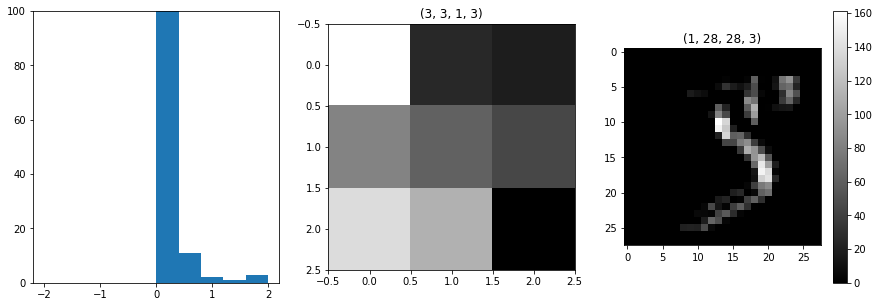

In [13]:
plt.figure(figsize = (15, 5)) #이미지의 사이즈를 이렇게 설정하고, 
plt.subplot(1, 3, 1)
plt.hist(output.numpy().ravel(), range = [-2, 2])
plt.ylim(0, 100)

plt.subplot(1, 3, 2)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')


plt.subplot(1, 3, 3)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

#image가 두번째 에 시각화 된 filter를 통해 세번째 시각화 된 output이미지가 된 것이다. 

### 2) Activation Function

In [14]:
tf.keras.layers.ReLU()

In [15]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [16]:
output.shape

TensorShape([1, 28, 28, 3])

In [17]:
np.min(output), np.max(output)

(0.0, 270.9371)

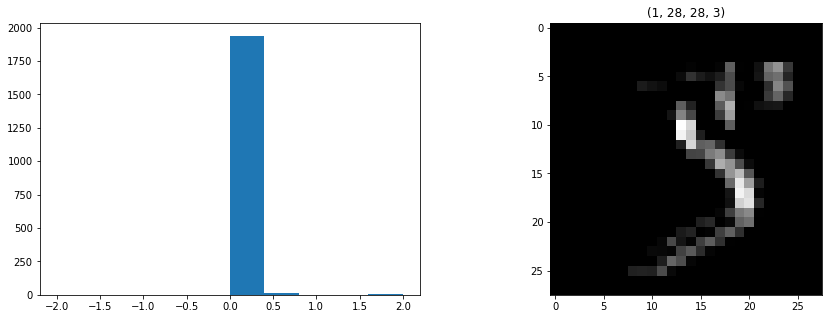

In [18]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(act_output.numpy().ravel(), range = [-2, 2])

plt.subplot(1, 2, 2)
plt.title(act_output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

### 3) pooling : 
이미지를 앞에서 받으면 그걸 일정 기준으로 줄여가면서 강조되는 것만 뽑아서 압축시켜나가는 것

In [19]:
tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'SAME')

In [20]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'SAME') #이런 pooling을 위한 layer을 만든다. 
#보통 pool_size는 (2, 2), stride는 (2, 2)로 한다. 

In [21]:
pool_output = pool_layer(act_output)

In [22]:
print(act_output.shape) #(1, 28, 28, 3)
print(pool_output.shape) #(1, 14, 14,  3) 
#이렇게 반으로 줄어든 것을 알 수 있다. 

(1, 28, 28, 3)
(1, 14, 14, 3)


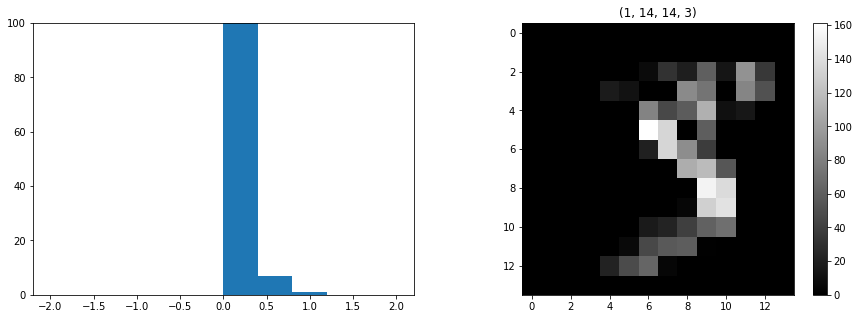

In [23]:
#시각화
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(pool_output.numpy().ravel(), range = [-2, 2])
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

## 3. Classification

### 1) fully connected
![title](img/dnn_architecture-2.png)
y = wX + b

In [2]:
![title](img/dnn_architecture-2.png)

/bin/sh: -c: line 0: syntax error near unexpected token `img/dnn_architecture-2.png'
/bin/sh: -c: line 0: `[title](img/dnn_architecture-2.png)'


### 2) Flatten

In [24]:
import tensorflow as tf

In [25]:
tf.keras.layers.Flatten()

In [26]:
layer = tf.keras.layers.Flatten()

In [27]:
flatten = layer(output)

In [28]:
output.shape

TensorShape([1, 28, 28, 3])

In [29]:
flatten.shape #28*28*3 = 2352 로 사이즈는 그대로 유지되면서 하나로 쭉 펴짐

TensorShape([1, 2352])

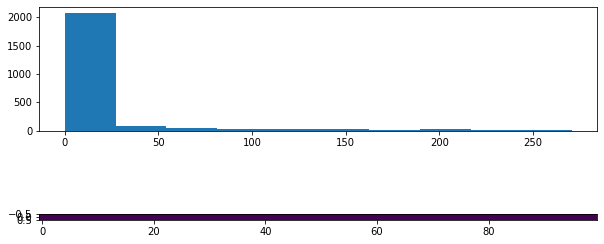

In [30]:
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
plt.hist(flatten.numpy().ravel())
plt.subplot(2, 1, 2)
plt.imshow(flatten[:, :100])
plt.show()

### 3) Dense
: 하나하나씩 연결하겠다라는 의미

In [31]:
tf.keras.layers.Dense(45, activation = 'relu') #32라는건 앞의 (28*28*3 )2352개 중 32개를 다음 노드로(유닛으로) 내보내겠다 라는 의미이다.

In [32]:
layer = tf.keras.layers.Dense(45, activation ='relu')

In [33]:
#output = layer(flatten)

In [34]:
output.shape

TensorShape([1, 28, 28, 3])

### 4) DropOut
: 학습 시 overfitting 방지하기위해 자동으로 node와의 연결을 끊는 것

In [35]:
layer = tf.keras.layers.Dropout(0.7) #얼마나 끊어 낼 것인지 비율을 준다. 
output = layer(output)

In [36]:
output.shape #끊어준다는 것이지 모양을 바꾸겠다는 것이 아니므로 유지된다. 

TensorShape([1, 28, 28, 3])

## 4. Bulid Model 
: 지금까지 학습한 것을 모아서 한 번에 모델을 만들어보자.

In [3]:
from tensorflow.keras import layers

In [4]:
#모델 설계 단계1. input으로 들어갈 모델의 shape알기
input_shape = (28, 28, 1) 
#단계2. 그리고 그 데이터에 대한 클래스 갯수
num_classes = 10

In [5]:
#단계3. 그리고 input이 필요
inputs = layers.Input(shape = input_shape)

#### Feature Extraction

In [6]:
# 단계4. 본격적으로 1)Convolution, 2)Activation fucntion

#앞에서 layer = tf.keras.layers.Conv2D(filters = 3, kernel_size = (2, 2), strides = (3, 3), padding = 'SAME', activation = 'relu') 이렇게 한 거
net  = layers.Conv2D(32, 3, padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)

net  = layers.Conv2D(32, 3, padding = 'SAME')(net) #처음만 input이라는거 주의
net = layers.Activation('relu')(net)

In [7]:
#단계5. 3)Pooling

#앞에서 pool_layer = tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'SAME') #이런 pooling을 위한 layer을 만든다. 

net  = layers.MaxPool2D((2, 2))(net)

In [95]:
#단계6. 4)DropOut

#앞에서 layer = tf.keras.layers.Dropout(0.7) 

net = layers.Dropout(0.25)(net)


In [96]:
#이걸 반복

net  = layers.Conv2D(64,  3, padding = 'SAME')(net)
net = layers.Activation('relu')(net)

net  = layers.Conv2D(64, 3, padding = 'SAME')(net) 
net = layers.Activation('relu')(net)

net  = layers.MaxPool2D((2, 2))(net)

net = layers.Dropout(0.25)(net)

#### Fully Connected

In [97]:
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net) #마지막은 class의 갯수만큼 노드를 만들어주어야 함

In [98]:
net = layers.Activation('softmax')(net) #확률로 표현해주는 softmax

In [99]:
#마지막으로 keras의 모델에 넣어준다. 
model  = tf.keras.Model(inputs =inputs, outputs = net, name ='Basic_CNN')

In [100]:
model

In [101]:
model.summary() #keras 의 큰 장점으로 summary()를 하면 모델의 정보에 대해서 잘 나온다. 

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_32 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_33 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 32)        0 